# Deep Learning for Classification
Course 5 assignment

## Objective
The goal of this project is to build a deep learning model to classify 3 types of fruits and their state (fresh or rotten). The experimentation will be based on trying to build a DL model from scratch as well as to use ImageNet model for transfer learning.


## Dataset
This dataset consists of pictures of fresh and rotten fruits of 3 types, banana, organge and apples. This implies there are 6 classes or categories of fruits in the dataset: fresh apple, fresh banana, fresh orange, rotten apple, rotten banana, rotten orange. The training dataset consists of 1182 images and the test dataset consists of 329 images. Although the original dataset consists of 10,901 pictures and the test dataset consists of 2,698 pictures, here a smaller subset is used due to lack of computation power on the local desktop system. Each of these pictures are color photos with a 32 bit color depth, and PNG format. The size of the pictures vary with the largest picture being not more than 500 x 500 pixels. On average each image is around 250 x 250 pixels. Shown below is an example from the dataset. The original dataset can be downloaded from Kaggle: https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

In [24]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras import Input 

from sklearn.preprocessing import LabelEncoder

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Helper function
def get_data(path, fruit_classes):
    
    xdata = list()
    ydata  = list()
    
    for fclass in fruit_classes:
        # get list of files
        piks = os.listdir(os.path.join(path, fclass))

        # Loop through files and append to list
        for pik in piks:
            fname = os.path.join(path, fclass, pik)
            
            img = load_img(fname)
            img = img.resize((256, 256))
            
            xdata.append(img_to_array(img))
            ydata.append(fclass)
        
    return np.array(xdata).astype(float), np.array(ydata).astype(object)

In [4]:
# Get list of classes
fruit_classes = os.listdir('data/fruits/train/')

# Get training data
x_train, y_train = get_data('data/fruits/train/', fruit_classes)

x_test, y_test = get_data('data/fruits/valid/', fruit_classes)

print('Size of Training Data: {}\nSize of Test Data: {}'.format(x_train.shape, x_test.shape))

Size of Training Data: (1182, 256, 256, 3)
Size of Test Data: (329, 256, 256, 3)


Sample image from training data:


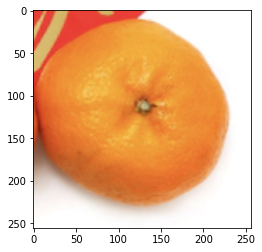

In [5]:
print('Sample image from training data:')
plt.imshow(x_train[100] / 255)

Here the data was loaded into a Numpy ndarray. All images have 3 channels (RGB) and were resized to 256 x 256 pixels for modeling. Above is a sample image from the training dataset.

### Data cleaning and preprocessing
This dataset does not need any further cleaning as we are working with a model for classifying images. However, the RGB channels have pixel values in the range of 0 to 255. Therefore training and test data are scaled from 0 to 1. Furthermore, the y_test and y_train data have categorical objects. These are first encoded to numbers using Label Encoder and then One Hot Encoded for modeling. Here 6 classes are used for encoding.

In [6]:
# Scale X data
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

# Encode Y data
num_classes = 6

y_train = to_categorical(LabelEncoder().fit_transform(y_train), num_classes)
y_test  = to_categorical(LabelEncoder().fit_transform(y_test), num_classes)

## Deep Learning Model - Build CNN
Now that the data has been processed, an initial model is built from scratch. The performance of the model is tested. The steps involved are:
1. Initialize a sequential model
2. add convolution layer with RELU activation function
3. add max pooling layer
4. add few more convolution and max pooling layers
5. add dense layer and a fully connected final dense layer 6 neurons with SoftMax activation
6. train and check performance

In [7]:
# Model with sequential capabilities
model = Sequential()

# First Convolution layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# 2nd conv layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# 3rd max pool layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
          
# 4th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# 5th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1)))
model.add(Activation('relu'))

# 6th layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 7th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# 8th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1)))
model.add(Activation('relu'))

# 9th layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 10th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Activation('relu'))

# 11th layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2)))
model.add(Activation('relu'))

# 12th layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      1

In [8]:
# Learning Rate & epochs & batch size
learning_rate = 0.005
batch_size    = 64
epochs        = 20

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
             metrics=['accuracy'])

# Fit model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
19/19 [==============================] - 20s 1s/step - loss: 4.4365 - accuracy: 0.1870 - val_loss: 1.7733 - val_accuracy: 0.2249
Epoch 2/20
19/19 [==============================] - 7s 343ms/step - loss: 1.7829 - accuracy: 0.2157 - val_loss: 1.7721 - val_accuracy: 0.2249
Epoch 3/20
19/19 [==============================] - 6s 301ms/step - loss: 1.8590 - accuracy: 0.2098 - val_loss: 1.7744 - val_accuracy: 0.2249
Epoch 4/20
19/19 [==============================] - 6s 299ms/step - loss: 1.8178 - accuracy: 0.2022 - val_loss: 1.7715 - val_accuracy: 0.2249
Epoch 5/20
19/19 [==============================] - 6s 299ms/step - loss: 1.7802 - accuracy: 0.2098 - val_loss: 1.7711 - val_accuracy: 0.2249
Epoch 6/20
19/19 [==============================] - 6s 299ms/step - loss: 1.7790 - accuracy: 0.2090 - val_loss: 1.7713 - val_accuracy: 0.2249
Epoch 7/20
19/19 [==============================] - 6s 299ms/step - loss: 1.7809 - accuracy: 0.2081 - val_loss: 1.7709 - val_accuracy: 0.2249
Epoch 8/

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'accuracy'), Text(0.5, 1.0, 'Accuracy')]

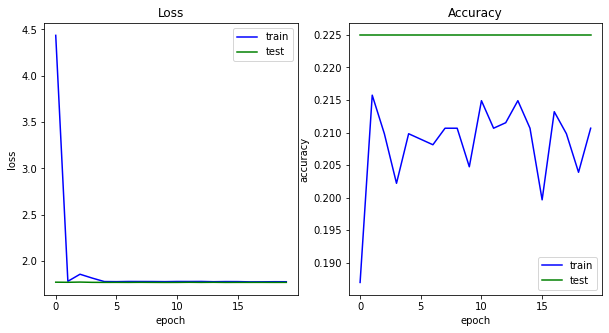

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# First training loss
ax1.plot(history.history['loss'], 'b')
ax1.plot(history.history['val_loss'], 'g')
ax1.legend(['train', 'test'])
ax1.set(xlabel='epoch', ylabel='loss', title='Loss')

ax2.plot(history.history['accuracy'], 'b')
ax2.plot(history.history['val_accuracy'], 'g')
ax2.legend(['train', 'test'])
ax2.set(xlabel='epoch', ylabel='accuracy', title='Accuracy')

In this initial run, the model did not perform well. Although the training loss reduce significantly after the first epoch, it remained relatively same through the remaining epochs. Same is true for accuracy which increased initially for the training datatset but remained almost similar for the rest of the epochs. However, there is no significant reduction in validation loss or increase in validation accuracy through epochs. Therefore, the model will be retrained for another 50 epochs, and increasing the learning rate to 0.01 and adding decay of 1e-6 to see if the model performs well.

In [17]:
# Change leraning rate and add decay
K.set_value(model.optimizer.learning_rate, 0.01)
K.set_value(model.optimizer.decay, 1e-6)

In [19]:
epochs=50
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
19/19 [==============================] - 6s 294ms/step - loss: 1.7798 - accuracy: 0.2124 - val_loss: 1.7700 - val_accuracy: 0.2249
Epoch 2/50
19/19 [==============================] - 6s 294ms/step - loss: 1.7779 - accuracy: 0.2081 - val_loss: 1.7711 - val_accuracy: 0.2249
Epoch 3/50
19/19 [==============================] - 6s 294ms/step - loss: 1.7801 - accuracy: 0.2030 - val_loss: 1.7729 - val_accuracy: 0.2249
Epoch 4/50
19/19 [==============================] - 6s 295ms/step - loss: 1.7804 - accuracy: 0.2166 - val_loss: 1.7706 - val_accuracy: 0.2249
Epoch 5/50
19/19 [==============================] - 6s 298ms/step - loss: 1.7796 - accuracy: 0.2140 - val_loss: 1.7715 - val_accuracy: 0.2249
Epoch 6/50
19/19 [==============================] - 6s 303ms/step - loss: 1.7786 - accuracy: 0.2073 - val_loss: 1.7711 - val_accuracy: 0.2249
Epoch 7/50
19/19 [==============================] - 6s 299ms/step - loss: 1.7797 - accuracy: 0.2124 - val_loss: 1.7716 - val_accuracy: 0.2249
Epoch 

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'accuracy'), Text(0.5, 1.0, 'Accuracy')]

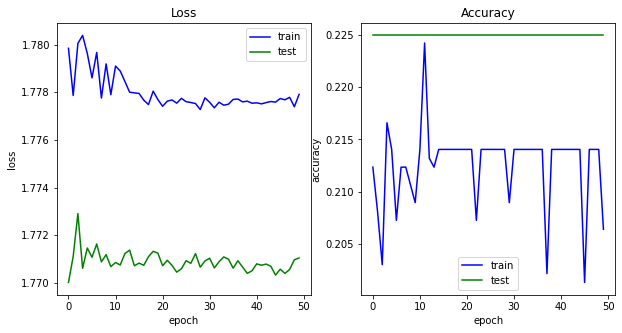

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# First training loss
ax1.plot(history.history['loss'], 'b')
ax1.plot(history.history['val_loss'], 'g')
ax1.legend(['train', 'test'])
ax1.set(xlabel='epoch', ylabel='loss', title='Loss')

ax2.plot(history.history['accuracy'], 'b')
ax2.plot(history.history['val_accuracy'], 'g')
ax2.legend(['train', 'test'])
ax2.set(xlabel='epoch', ylabel='accuracy', title='Accuracy')

After running the model for another 50 epochs, it can be seen that the current network is not doing any better at classifying the images as evidenced by the training and test loss, as well as the training and test accuracy. Throughout the epochs, the training and validation loss remained relatively constant at 1.77, while the training and validation accuracy remained relatively constant at 0.214 and 0.225 respectively. It can be inferred that the current Neural Network model is not ideal for training this dataset. The solution to this is to build a more complex model by increasing the convolution and dense layers. The model would also benefit from training on a larger dataset. Due to lack of computation power, a much larger dataset is not being used. An alternate approach to training on this dataset is to use an existing / pre-trained model, transfer its learned parameters and train on this dataset.

## Deep Learning model - Transfer Learning from ImageNet
To get better prediction on the current dataset, a model pretrained on ImageNet will be used. The ImageNet trained model will be loaded with appropriate weights, and the last layer will be removed. A new dense layer will be added to match the output classes for the current dataset. The model will be trained as before to test its performance. Steps include:
1. Load pre-trained ImageNet model
2. remove last layer so that a new layer corresponding to the output size can be added
3. freeze layers
4. add new dense layer corresponding to the output classification size
5. train and check model performance

In [36]:
from tensorflow.keras.applications import VGG16

# ImageNet base model
base_model = VGG16(weights='imagenet',
                   input_shape=x_train.shape[1:],
                   include_top=False)

# Freeze base model
base_model.trainable = False

# print summary of base model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [37]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Create model from base model
inputs = Input(shape=x_train.shape[1:])

base_layer = base_model(inputs, training=False)

# Add pooling layer
layer1 = GlobalAveragePooling2D()(base_layer)

# Dense classifier with 6 neurons
outputs = Dense(6, activation='softmax')(layer1)

# Combine to build model
model2 = Model(inputs, outputs)

# Compile
model2.compile(loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
# Learning Rate & epochs & batch size
epochs = 20

# Fit model
history2 = model2.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
37/37 [==============================] - 9s 238ms/step - loss: 1.6808 - accuracy: 0.3689 - val_loss: 1.5328 - val_accuracy: 0.5684
Epoch 2/20
37/37 [==============================] - 9s 234ms/step - loss: 1.4591 - accuracy: 0.5905 - val_loss: 1.3612 - val_accuracy: 0.6292
Epoch 3/20
37/37 [==============================] - 9s 235ms/step - loss: 1.2981 - accuracy: 0.6887 - val_loss: 1.2081 - val_accuracy: 0.7112
Epoch 4/20
37/37 [==============================] - 9s 238ms/step - loss: 1.1623 - accuracy: 0.7420 - val_loss: 1.0864 - val_accuracy: 0.8146
Epoch 5/20
37/37 [==============================] - 9s 240ms/step - loss: 1.0494 - accuracy: 0.7750 - val_loss: 0.9954 - val_accuracy: 0.7812
Epoch 6/20
37/37 [==============================] - 9s 241ms/step - loss: 0.9579 - accuracy: 0.7986 - val_loss: 0.9132 - val_accuracy: 0.8511
Epoch 7/20
37/37 [==============================] - 9s 242ms/step - loss: 0.8827 - accuracy: 0.8367 - val_loss: 0.8477 - val_accuracy: 0.8267
Epoch 

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'accuracy'), Text(0.5, 1.0, 'Accuracy')]

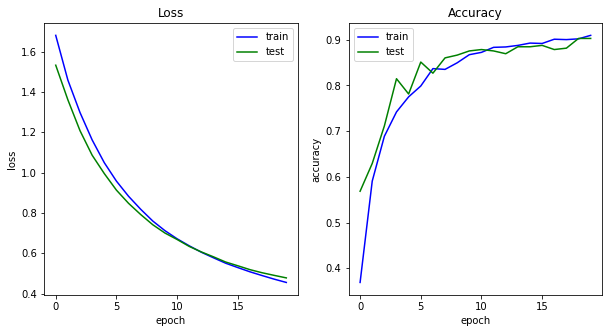

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# First training loss
ax1.plot(history2.history['loss'], 'b')
ax1.plot(history2.history['val_loss'], 'g')
ax1.legend(['train', 'test'])
ax1.set(xlabel='epoch', ylabel='loss', title='Loss')

ax2.plot(history2.history['accuracy'], 'b')
ax2.plot(history2.history['val_accuracy'], 'g')
ax2.legend(['train', 'test'])
ax2.set(xlabel='epoch', ylabel='accuracy', title='Accuracy')

Model built using a pre-trained ImageNet model performed significantly better than the previous model. The reason for significant improvement is that the ImageNet model is a much complex model and has been trained on a much larger dataset. The ImageNet model has 14,714,688 parameters that were pre-trained compared to just 511,782 parameters in the model built in the previous sections. The training and validation loss using the pre-trained network is 0.455 and 0.4778 respectively, while the training and testing accuracy improved significantly to 90% compared with previous accuracy of just 22%.

Given this improved accuracy, Model2 is the model of choice for the current dataset. The earlier model can be improved by building few more deeper layers and training on a much larger dataset and for much longer time. Given sufficient data and training time, Model1 could also achieve much improved performance.